## Programming for Data Analytics Big Project

*******************

##### Author: Jennifer Ibanez Cano

##### Module: PFDA, ATU course 24/25
##### Lecture: Andrew Beatty 

*****************

##### Description

This notebook contains my work performing data analysis on a data. For this project I'll be using a data set from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/863/maternal+health+risk), that I found very interesting. 

This dataset has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.

*********

##### Analyzing the data

In [55]:
# First I'll import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [56]:
# Read the data from the csv file

df = pd.read_csv('data/Maternal Health Risk Data Set.csv')

df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [57]:
# Check the list of the columns in the dataset.

list(df.columns)

['Age',
 'SystolicBP',
 'DiastolicBP',
 'BS',
 'BodyTemp',
 'HeartRate',
 'RiskLevel']

The dataset contains 7 variables: Age, Systolic Blood Pressure as SystolicBP, Diastolic BP as DiastolicBP, Blood Sugar as BS, Body Temperature as BodyTemp, HeartRate and RiskLevel. All this variable are factors that can be responsible and as a significant risk factors for maternal mortality.

In [58]:
# Looking at the length of the dataset

print('Data length:', len(df), 'entries.')

Data length: 1014 entries.


In [59]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [60]:
# Applying dropna() to remove any missing values in the dataset

df = df.dropna()

In [61]:
df.iloc[0]

Age                   25
SystolicBP           130
DiastolicBP           80
BS                  15.0
BodyTemp            98.0
HeartRate             86
RiskLevel      high risk
Name: 0, dtype: object

In [62]:
# Renaming the first column as 'Participant' in the survey
df.rename_axis('Participant', inplace=True)

df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Participant,,,,,,,
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


<Axes: xlabel='Participant', ylabel='Age'>

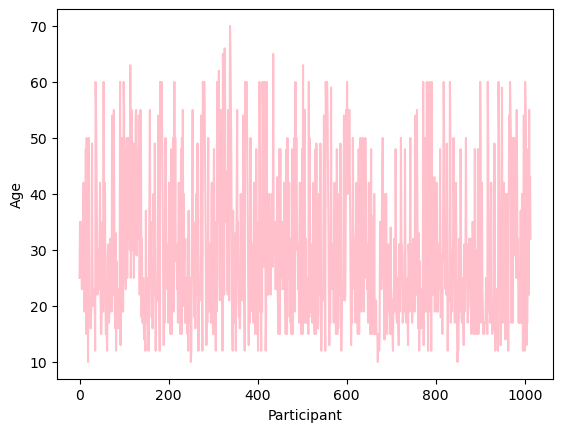

In [63]:
# Plotting the age of the participants in the survey 
sns.lineplot(data=df, x=df.index, y="Age", color='pink')

In [64]:
# Looking at the minimum and maximum age in the dataset.
min_age = df['Age'].min()
print("The minimum age in this data set is", min_age, 'years old.')

max_age = df['Age'].max()
print("The maximum age in this data set is", max_age, 'years old.')

The minimum age in this data set is 10 years old.
The maximum age in this data set is 70 years old.


In [65]:
# Creating a function to categorize age groups
def categorize_age(age):
    if age < 18:
        return "<18"
    elif 19 <= age <= 29:
        return "19-29"
    elif 30 <= age <= 39:
        return "30-39"
    elif 40 <= age <= 49:
        return "40-49"
    elif 50 <= age <= 59:
        return "50-59"
    else:
        return ">60"

# Applying the function to create a new column named 'Age_Group'
df['Age_Group'] = df['Age'].apply(categorize_age)

# Looking at the new column 'Age_Group'
print(df.head())


             Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  \
Participant                                                            
0             25         130           80  15.0      98.0         86   
1             35         140           90  13.0      98.0         70   
2             29          90           70   8.0     100.0         80   
3             30         140           85   7.0      98.0         70   
4             35         120           60   6.1      98.0         76   

             RiskLevel Age_Group  
Participant                       
0            high risk     19-29  
1            high risk     30-39  
2            high risk     19-29  
3            high risk     30-39  
4             low risk     30-39  


In [66]:
# Looking at the number of participants in each age group

df['Age_Group'].value_counts()

Age_Group
19-29    374
<18      193
30-39    176
40-49    114
50-59     96
>60       61
Name: count, dtype: int64

We can see that the age group 19-29 years has the largest number of participants, followed by the age group of women under 18, then the women group of 30-39 years old, and the other age groups of women over 40s

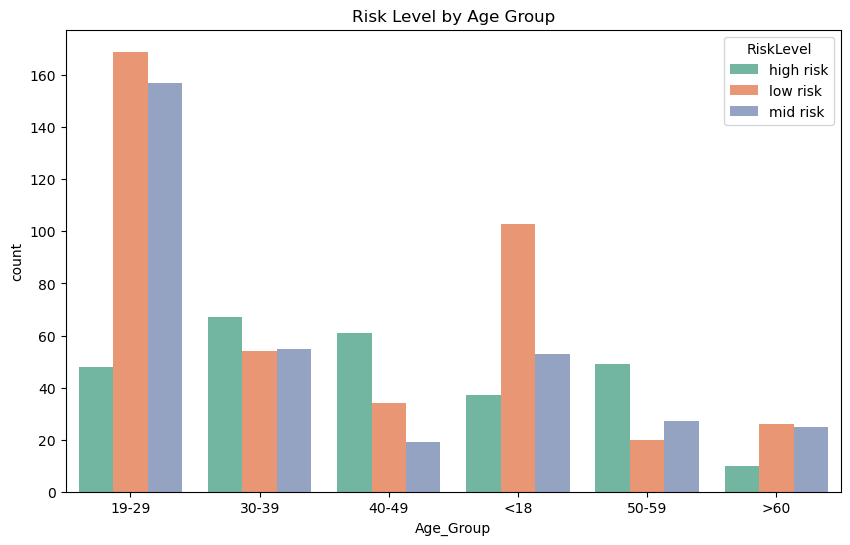

In [67]:
# Looking at the risk level of the participants by age group.

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', hue='RiskLevel', palette='Set2')
plt.title('Risk Level by Age Group')
plt.show()


With this plot we can compare the risk level between the ages group. 

As the groups of participants in ages group of under 18 and between 19 and 29 are the ones with more participants those groups shows the low risk and mid risk between the women. 

On other hand the groups ages between 30 and 59 are the ones showing high risk. 

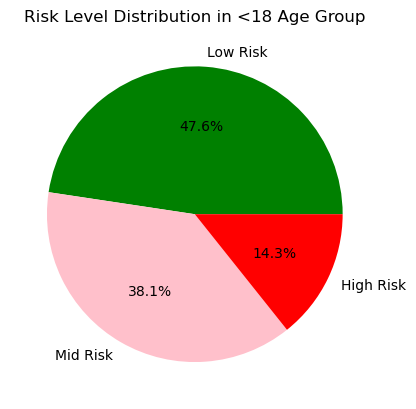

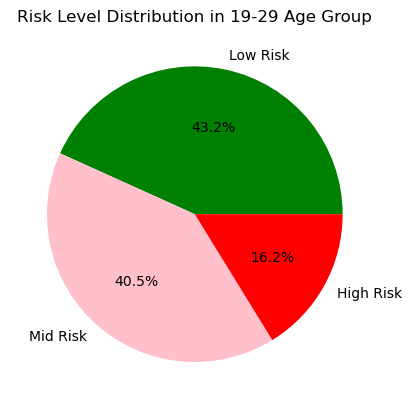

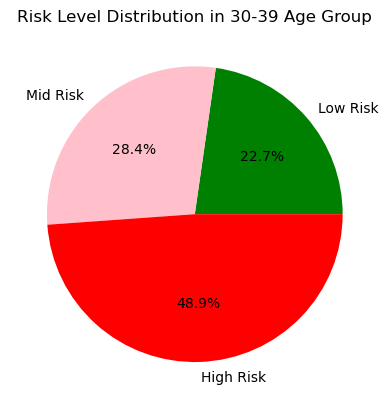

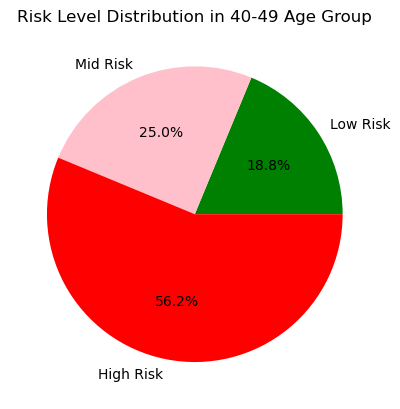

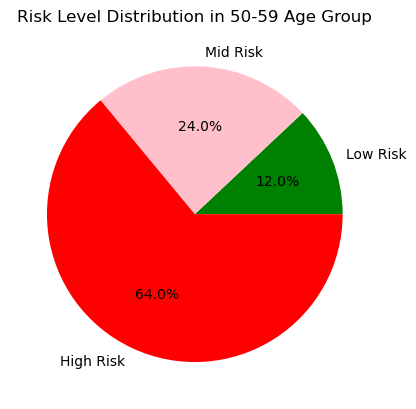

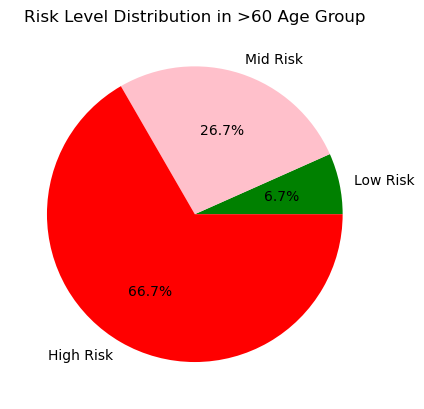

In [69]:
# Looking at the risk level of the participants by age group in a pie chart

age_groups = ["<18", "19-29", "30-39", "40-49", "50-59", ">60"]
low_risk = [100, 160, 40, 30, 15, 5]
mid_risk = [80, 150, 50, 40, 30, 20]
high_risk = [30, 60, 86, 90, 80, 50]

risk_data = list(zip(low_risk, mid_risk, high_risk))
labels = ["Low Risk", "Mid Risk", "High Risk"]
colors = ["green", "pink", "red"]

for i, age_group in enumerate(age_groups):
    plt.figure()
    plt.pie(risk_data[i], labels=labels, autopct="%1.1f%%", colors=colors)
    plt.title(f"Risk Level Distribution in {age_group} Age Group")
    plt.show()

With the pie charts we can see the percents more clear:
- The hight risk in maternity is in women of the age group over 60 and followed very close by women in their 50s and over. 
- The mid risk in maternity is kind of the same in all the ages groups. 
- The lower risk in maternity is show in the ages groups of women under 18 and between 19-29 years old. 

************
##### References


******

End